In [31]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
data_train = pd.read_csv("/content/drive/MyDrive/dataset/train.csv")
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
X_train = data_train[["YearBuilt","GarageArea","PoolArea","FullBath","1stFlrSF","2ndFlrSF"]].values
Y_train = data_train[["SalePrice"]].values

In [ ]:
X_train.shape , Y_train.shape

((1460, 6), (1460, 1))

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(6,activation="sigmoid"),
    tf.keras.layers.Dense(30,activation="relu"),
    tf.keras.layers.Dense(14,activation="tanh"),
    tf.keras.layers.Dense(1,activation="linear")
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01) ,
              loss = "mse")

In [ ]:
output = model.fit(X_train,Y_train,epochs=300)

Epoch 1/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 38467616768.0000
Epoch 2/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 39156006912.0000
Epoch 3/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 39005880320.0000
Epoch 4/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 39471493120.0000
Epoch 5/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37661450240.0000
Epoch 6/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 38699442176.0000
Epoch 7/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37273563136.0000
Epoch 8/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36385406976.0000
Epoch 9/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36987187200.0000
Epoch 10/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 38142767104.0000
Epoch 11/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 39411519488.0000
Epoch 12/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 38846689280.0000
Epoch 13/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 38977617920.0000
Epoch 14

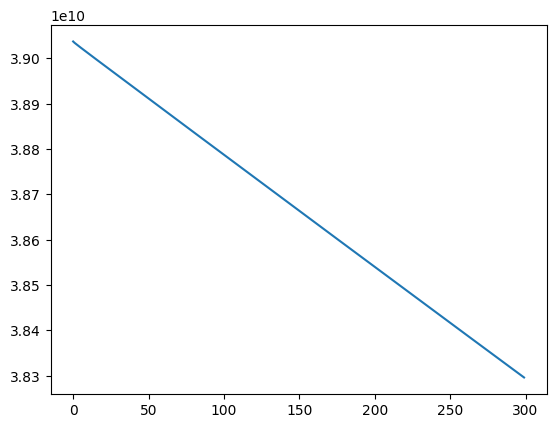

In [ ]:
plt.plot(output.history["loss"])
plt.show()

In [ ]:
data_test = pd.read_csv("/content/drive/MyDrive/dataset/test.csv")
data_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
X_test = data_test[["YearBuilt","GarageArea","PoolArea","FullBath","1stFlrSF","2ndFlrSF"]].values
# Y_train = data_train[["SalePrice"]].values

In [ ]:
my_house = np.array([[2016,12,0,1,110,0]])
model.predict(my_house)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


array([[2069.8684]], dtype=float32)

In [ ]:
model.save("moein_model.h5")

-----

In [34]:
model = tf.keras.models.load_model("moein_model.h5")

TypeError: Could not locate function 'mse'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'module': 'keras.metrics', 'class_name': 'function', 'config': 'mse', 'registered_name': 'mse'}